****
# Housing in Mexico City
****

# Data Description
Mexico is a country that boasts a rich cultural heritage and diverse geography, from sandy beaches and lush rainforests to arid deserts and snow-capped mountains. In recent years, Mexico's housing market has become an increasingly important sector of its economy, driven by rising demand from both domestic and foreign buyers. With a growing population and a strong economy, there is a high demand for affordable housing across the country, particularly in urban areas. Despite this, there is a shortage of affordable housing options in many areas of the country, making it difficult for many families to find suitable homes. The government has implemented various programs to address this issue, but there is still much work to be done to ensure that all Mexicans have access to safe, comfortable, and affordable housing. This has created an opportunity for researchers and practitioners to explore innovative solutions using data science and machine learning techniques to improve the accessibility and quality of housing in Mexico.

***The dataset contains information about different properties that are available for sale in Mexico. Here is a brief description of the columns:***

- operation: The type of transaction - whether it is a sale or a rental.
- property_type: The type of property - whether it is an apartment, house, or commercial property, etc.
- place_with_parent_names: A hierarchical representation of the location of the property, with the top level being the country, followed by state/province, city, and finally the neighborhood.
- lat-lon: The latitude and longitude of the property.
- price: The price of the property in the local currency (MXN - Mexican Peso).
- currency: The currency in which the price is mentioned.
- price_aprox_local_currency: The price of the property in local currency (MXN).
- price_aprox_usd: The price of the property in US dollars.
- surface_total_in_m2: The total surface area of the property in square meters.
- surface_covered_in_m2: The covered surface area of the property in square meters.
- price_usd_per_m2: The price of the property per square meter in US dollars.
- price_per_m2: The price of the property per square meter in local currency (MXN).

****
# Data Wrangling and Visualisations

In [1]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Housing_Mexico.xlsx")

In [2]:
df.head()

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,apartment,|Gustavo A. Madero|Distrito Federal|México|,"19.516777,-99.160149",1200000.0,MXN,1189144.46,63223.78,88.0,88.0,718.452045,13636.363636,NaN,NaN,NaN,http://gustavo-a-madero.properati.com.mx/r644_...
1,sell,apartment,|Gustavo A. Madero|Distrito Federal|México|,"19.466724,-99.131614",480000.0,MXN,475657.74,25289.51,NaN,48.0,NaN,10000.000000,NaN,NaN,NaN,http://vallejo.properati.com.mx/mz4c_venta_dep...
2,sell,apartment,|Álvaro Obregón|Distrito Federal|México|,"19.33228,-99.243934",4559261.0,MXN,4518016.68,240211.43,NaN,126.0,NaN,36184.611111,NaN,NaN,NaN,http://alvaro-obregon.properati.com.mx/jh8j_ve...
3,sell,apartment,|Benito Juárez|Quintana Roo|México|,"21.1105772788,-86.8537859927",3808088.0,MXN,3774533.79,200682.34,0.0,171.0,NaN,22269.520468,NaN,NaN,NaN,http://cancun.properati.com.mx/qus8_venta_depa...
4,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.39365,-99.14769",1730000.0,MXN,1714349.82,91147.61,NaN,100.0,NaN,17300.000000,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/q5my_ven...


In [3]:
df.describe()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,4.552000e+03,4.552000e+03,4.552000e+03,1781.000000,4.445000e+03,1260.000000,4.262000e+03,322.000000,117.000000,1.0
mean,3.306778e+06,5.434036e+06,2.889139e+05,534.417743,1.138967e+03,1769.550378,2.212263e+04,2.232919,2.717949,3500.0
std,4.801896e+06,9.408260e+06,5.002132e+05,3939.636201,3.825451e+04,1583.550619,4.644919e+04,0.620348,1.298847,NaN
min,3.400000e+04,1.268419e+05,6.743860e+03,0.000000,0.000000e+00,4.981419,1.000000e+00,1.000000,1.000000,3500.0
25%,8.986910e+05,1.218873e+06,6.480437e+04,0.000000,6.700000e+01,710.532027,9.669148e+03,2.000000,2.000000,3500.0
50%,1.858000e+06,2.577091e+06,1.370173e+05,110.000000,1.000000e+02,1328.304171,1.607275e+04,2.000000,2.000000,3500.0
75%,3.800000e+06,5.266380e+06,2.800000e+05,254.000000,2.180000e+02,2334.862385,2.911184e+04,3.000000,3.000000,3500.0
max,1.184755e+08,1.504680e+08,8.000000e+06,100373.000000,1.730000e+06,20618.855000,2.700000e+06,5.000000,10.000000,3500.0


In [4]:
df.corr()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
price,1.000000,0.442962,0.442962,0.050146,-0.005964,0.160266,0.186333,0.068365,0.277402,NaN
price_aprox_local_currency,0.442962,1.000000,1.000000,0.106193,-0.006929,0.482033,0.013841,0.016930,0.109404,NaN
price_aprox_usd,0.442962,1.000000,1.000000,0.106193,-0.006929,0.482033,0.013841,0.016930,0.109404,NaN
surface_total_in_m2,0.050146,0.106193,0.106193,1.000000,0.030359,-0.112790,-0.001566,-0.113132,0.193835,NaN
surface_covered_in_m2,-0.005964,-0.006929,-0.006929,0.030359,1.000000,0.074137,-0.012654,0.045958,0.252763,NaN
price_usd_per_m2,0.160266,0.482033,0.482033,-0.112790,0.074137,1.000000,0.324570,0.244255,-0.117771,NaN
price_per_m2,0.186333,0.013841,0.013841,-0.001566,-0.012654,0.324570,1.000000,-0.011100,-0.225759,NaN
floor,0.068365,0.016930,0.016930,-0.113132,0.045958,0.244255,-0.011100,1.000000,NaN,NaN
rooms,0.277402,0.109404,0.109404,0.193835,0.252763,-0.117771,-0.225759,NaN,1.000000,NaN
expenses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(4628, 16)

In [6]:
df.isnull().sum()

operation                        0
property_type                    0
place_with_parent_names          0
lat-lon                        483
price                           76
currency                        76
price_aprox_local_currency      76
price_aprox_usd                 76
surface_total_in_m2           2847
surface_covered_in_m2          183
price_usd_per_m2              3368
price_per_m2                   366
floor                         4306
rooms                         4511
expenses                      4627
properati_url                    0
dtype: int64

In [7]:
df.operation.value_counts()

sell    4628
Name: operation, dtype: int64

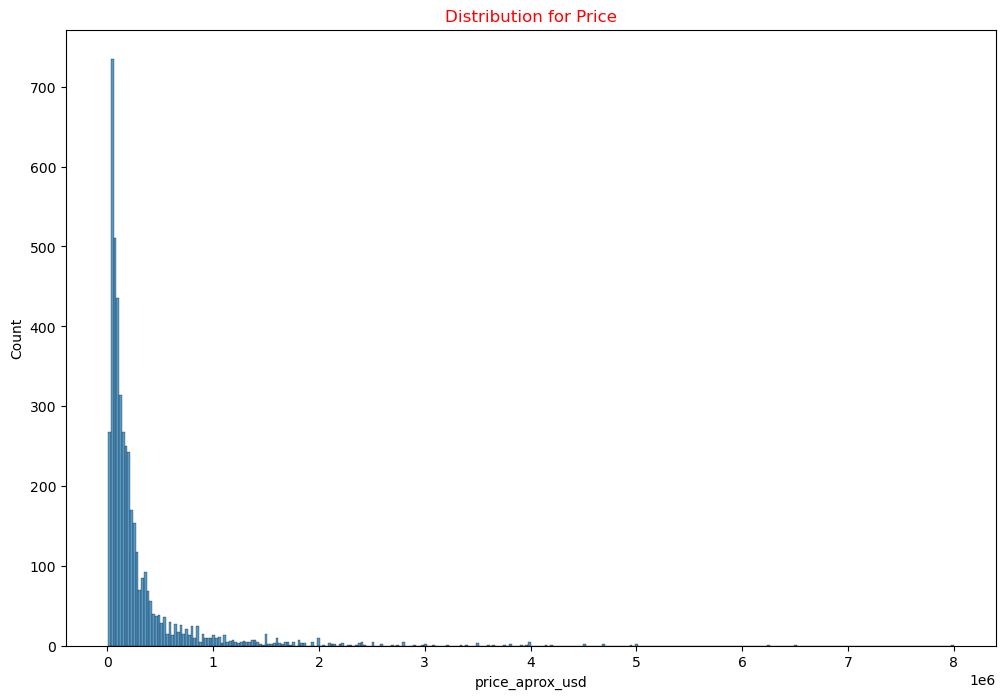

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(df["price_aprox_usd"])
plt.title("Distribution for Price", color="r")
plt.show()

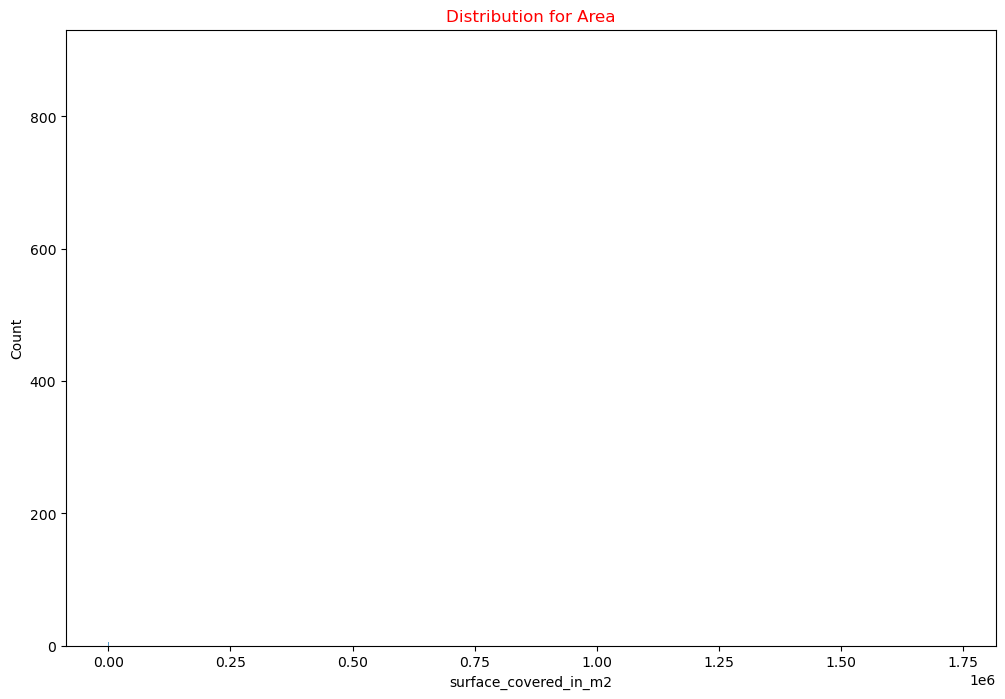

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(df["surface_covered_in_m2"])
plt.title("Distribution for Area", color="r")
plt.show()

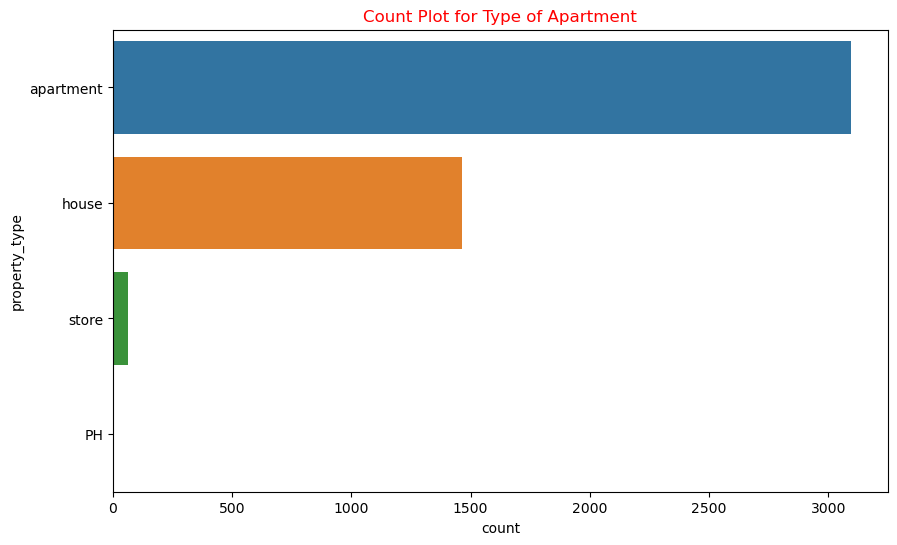

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y=df["property_type"])
plt.title("Count Plot for Type of Apartment", color="r")
plt.show()

In the property type category the PH column is an inferior class while the apartment category dominates, we have class imbalance

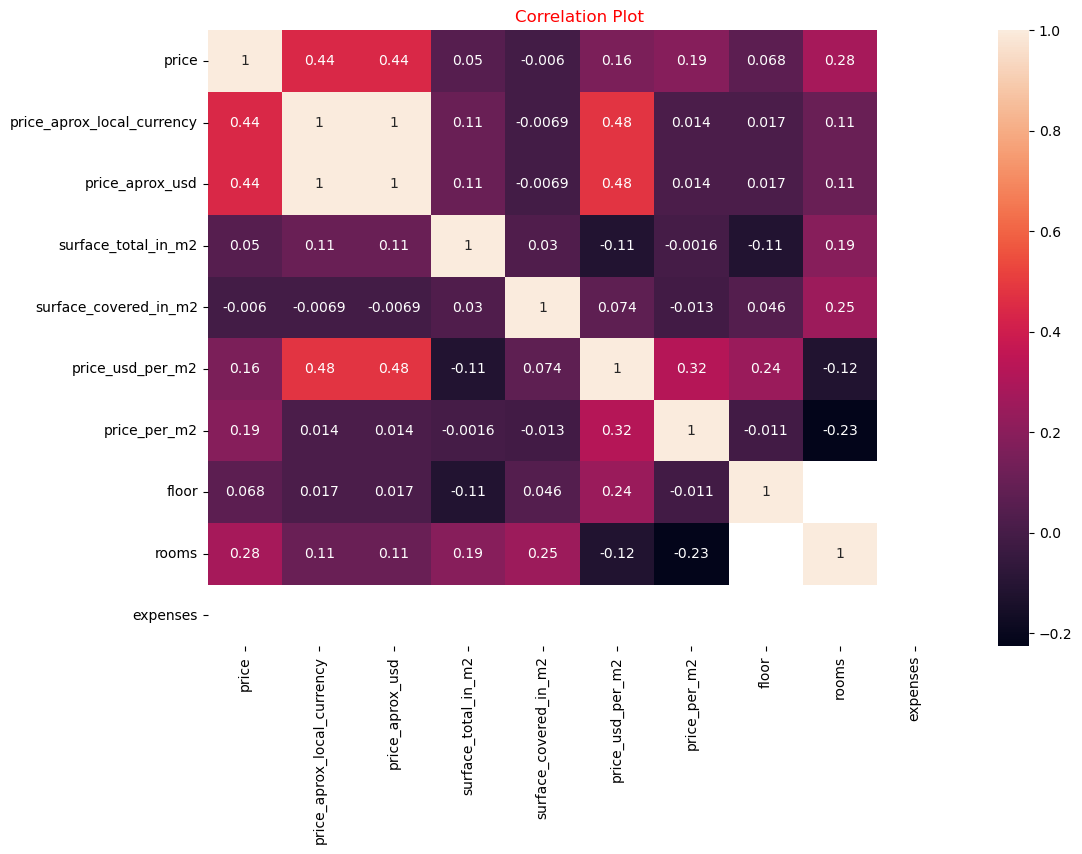

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Plot", color="r")
plt.show()

I suspect that there are leaky features which is shown by the high correlation among some of the price class

In [12]:
df.columns

Index(['operation', 'property_type', 'place_with_parent_names', 'lat-lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url'],
      dtype='object')

In [13]:
#dropping columns with null values, columns with
df.drop(columns=["rooms",
                 'properati_url',
                 'expenses',
                 'floor',
                 'price_aprox_local_currency',
                 "operation",
                 'place_with_parent_names',
                 "price_per_m2"], inplace=True)

In [14]:
df.head()

,property_type,lat-lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2
0,apartment,"19.516777,-99.160149",1200000.0,MXN,63223.78,88.0,88.0,718.452045
1,apartment,"19.466724,-99.131614",480000.0,MXN,25289.51,NaN,48.0,NaN
2,apartment,"19.33228,-99.243934",4559261.0,MXN,240211.43,NaN,126.0,NaN
3,apartment,"21.1105772788,-86.8537859927",3808088.0,MXN,200682.34,0.0,171.0,NaN
4,apartment,"19.39365,-99.14769",1730000.0,MXN,91147.61,NaN,100.0,NaN


In [15]:
#currency column seems useless as it contains only 1 unique value
df.drop(columns=["surface_total_in_m2", "lat-lon",
                 "currency"], inplace=True)


In [16]:
#dropping leaky features
df.drop(columns=['price_usd_per_m2', "price"], inplace=True)

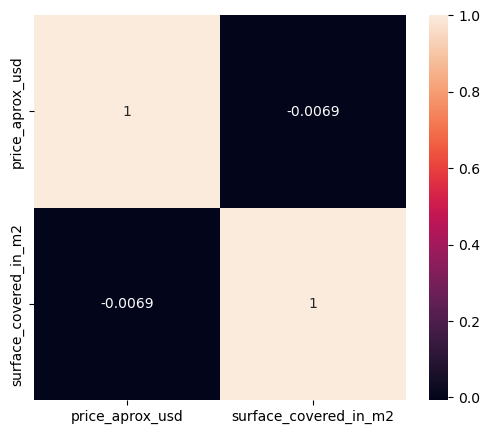

In [17]:
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(df.corr(), annot=True)

plt.show()

In [18]:
df.isnull().sum()

property_type              0
price_aprox_usd           76
surface_covered_in_m2    183
dtype: int64

In [19]:
df.dropna(inplace=True)
df.shape

(4373, 3)

***
# Model Building
***

***The model building is implemented using the make pipeline from Circuit skLearn***

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder
import category_encoders

X = df.drop(columns=["price_aprox_usd"])
y = df["price_aprox_usd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=0.2)

model1 = make_pipeline(
    OneHotEncoder(cols=["property_type"]),
    StandardScaler(),
    SimpleImputer(),
    LinearRegression()    
)

model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print(f"Root Mean squared value is : {rmse}")

Root Mean squared value is : 450205.0479736325


In [22]:
model = make_pipeline(
    OneHotEncoder(cols=["property_type"]),
    StandardScaler(),
    SimpleImputer(),
    Ridge()    
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean squared value is : {rmse}")

Root Mean squared value is : 450264.14892263286


In [23]:
model = make_pipeline(
    OneHotEncoder(cols=["property_type"]),
    StandardScaler(),
    SimpleImputer(),
    Lasso()    
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean squared value is : {rmse}")

Root Mean squared value is : 450266.2714774152


***
# Hyper-Parameter Tuning
***

In [24]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

params = {
    "linearregression__fit_intercept": [True, False],
    "linearregression__normalize": [True, False],
}

gs = GridSearchCV(model1, params, cv=5, scoring="neg_mean_squared_error")
gs.fit(X_train, y_train)
print(gs.best_params_)

y_pred = gs.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))

print(f"Root Mean squared value is : {rmse}")

{'linearregression__fit_intercept': True, 'linearregression__normalize': False}
Root Mean squared value is : 450205.0479736325
